<a href="https://colab.research.google.com/github/Aravindh0/Tasks/blob/main/SPRITLE_ML_Developer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.) Create two custom layers in TensorFlow that add two inputs and multiply two inputs
respectively [or any other mathematical operations of your choice(linear or
nonlinear)] Add layer names and other things that are present in other common
layers in TensorFlow.

In [ ]:
#Custom Addition Layer:
import tensorflow as tf

class AddLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AddLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.add(inputs[0], inputs[1])

    def get_config(self):
        config = super().get_config()
        return config

In [ ]:
#Custom Multiplication Layer:

class MultiplyLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiplyLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.multiply(inputs[0], inputs[1])

    def get_config(self):
        config = super().get_config()
        return config

2.) Combine these two layers in a third custom layer. Concatenate them or multiply
them etc

In [ ]:

#Custom Combined Layer (Concatenation):

class CombinedLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CombinedLayer, self).__init__(**kwargs)
        self.add_layer = AddLayer()  # Assuming AddLayer and MultiplyLayer are previously defined
        self.multiply_layer = MultiplyLayer()

    def call(self, inputs):
        added = self.add_layer(inputs)
        multiplied = self.multiply_layer(inputs)
        concatenated = tf.concat([added, multiplied], axis=-1)  # Concatenate along the last dimension
        return concatenated

    def get_config(self):
        config = super().get_config()
        return config

3. Create a model using these and observe how batch inference works.

In [ ]:

#Custom Layers
class AddLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AddLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.add(inputs[0], inputs[1])

    def get_config(self):
        config = super().get_config()
        return config

class MultiplyLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(MultiplyLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.multiply(inputs[0], inputs[1])

    def get_config(self):
        config = super().get_config()
        return config

class CombinedLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(CombinedLayer, self).__init__(**kwargs)
        self.add_layer = AddLayer()
        self.multiply_layer = MultiplyLayer()

    def call(self, inputs):
        added = self.add_layer(inputs)
        multiplied = self.multiply_layer(inputs)
        concatenated = tf.concat([added, multiplied], axis=-1)
        return concatenated

    def get_config(self):
        config = super().get_config()
        return config

# Create a model
input_1 = tf.keras.layers.Input(shape=(3,))
input_2 = tf.keras.layers.Input(shape=(3,))

combined = CombinedLayer()([input_1, input_2])
model = tf.keras.models.Model(inputs=[input_1, input_2], outputs=combined)

# Generate some dummy data for batch inference
import numpy as np
batch_size = 4
input_data_1 = np.random.rand(batch_size, 3)
input_data_2 = np.random.rand(batch_size, 3)

# Perform batch inference
predictions = model.predict([input_data_1, input_data_2])

print("Input Data 1:\n", input_data_1)
print("Input Data 2:\n", input_data_2)
print("Predictions:\n", predictions)

1/1 [==============================] - 0s 124ms/step
Input Data 1:
 [[0.57454089 0.49867206 0.69025245]
 [0.85554926 0.01440186 0.54360092]
 [0.35449344 0.87762908 0.65524333]
 [0.61771149 0.19590191 0.13430546]]
Input Data 2:
 [[0.5525221  0.47236694 0.63655099]
 [0.30986137 0.42342856 0.77956896]
 [0.89584738 0.95228708 0.73537802]
 [0.3396914  0.84954365 0.44841481]]
Predictions:
 [[1.127063   0.971039   1.3268034  0.31744656 0.2355562  0.43938085]
 [1.1654106  0.43783042 1.32317    0.26510167 0.00609816 0.42377442]
 [1.2503408  1.8299162  1.3906214  0.31757203 0.8357549  0.48185155]
 [0.9574029  1.0454456  0.5827203  0.20983128 0.16642721 0.06022456]]


4. Use a predefined layer in Tensorflow to split an input/image into 4x4 = 16 tiles.

In [ ]:
#Assuming 'image' is your input image (e.g., shape: (batch_size, height, width, channels))
#For demonstration purposes, let's create a dummy image
batch_size = 1
height, width, channels = 8, 8, 3
image = tf.random.normal((batch_size, height, width, channels))

#Define the parameters for patch extraction
patch_size = (1, 4, 4, 1)  # (batch_size, patch_height, patch_width, channels)
strides = (1, 4, 4, 1)  # How much to move the window in each dimension

#Extract patches from the image
patches = tf.image.extract_patches(images=image, sizes=[1, 4, 4, 1], strides=[1, 4, 4, 1], rates=[1, 1, 1, 1], padding='VALID')

print("Input Image Shape:", image.shape)
print("Extracted Patches Shape:", patches.shape)

Input Image Shape: (1, 8, 8, 3)
Extracted Patches Shape: (1, 2, 2, 48)


5. Write a graph data structure in python with random connections between nodes.

In [ ]:

import random

class Graph:
    def __init__(self):
        self.graph = {}

    def add_node(self, node):
        if node not in self.graph:
            self.graph[node] = []

    def add_edge(self, node1, node2):
        # Add edges between nodes
        if node1 in self.graph and node2 in self.graph:
            if node2 not in self.graph[node1]:
                self.graph[node1].append(node2)
            if node1 not in self.graph[node2]:
                self.graph[node2].append(node1)

    def print_graph(self):
        for node in self.graph:
            print(node, '->', ' '.join(map(str, self.graph[node])))

    def generate_random_connections(self, num_nodes, num_edges):
        # Generate random connections between nodes
        for _ in range(num_nodes):
            self.add_node(_)

        nodes = list(self.graph.keys())
        for _ in range(num_edges):
            node1 = random.choice(nodes)
            node2 = random.choice(nodes)
            self.add_edge(node1, node2)

#Create a graph and generate random connections
my_graph = Graph()
num_nodes = 5
num_edges = 8
my_graph.generate_random_connections(num_nodes, num_edges)

#Print the graph
my_graph.print_graph()

0 -> 2 1
1 -> 4 0 2 3
2 -> 0 3 1
3 -> 2 1
4 -> 1


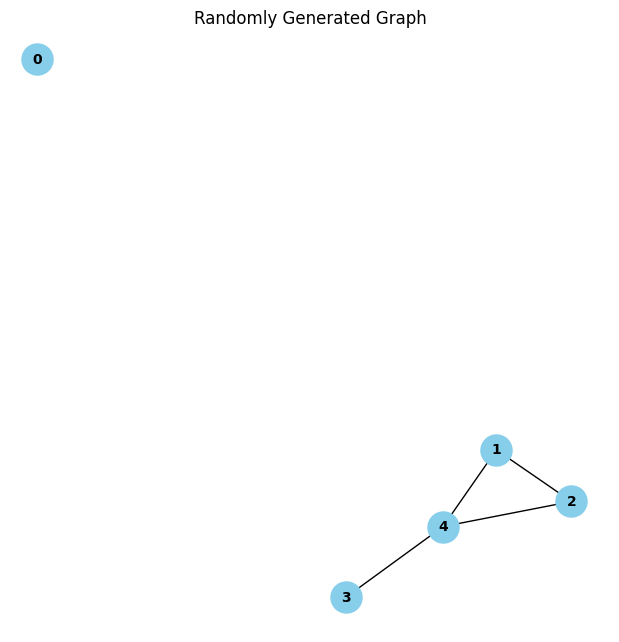

In [ ]:
import random
import networkx as nx
import matplotlib.pyplot as plt

class Graph:
    def __init__(self):
        self.graph = {}

    def add_node(self, node):
        if node not in self.graph:
            self.graph[node] = []

    def add_edge(self, node1, node2):
        if node1 in self.graph and node2 in self.graph:
            if node2 not in self.graph[node1]:
                self.graph[node1].append(node2)
            if node1 not in self.graph[node2]:
                self.graph[node2].append(node1)

    def visualize_graph(self):
        G = nx.Graph(self.graph)
        pos = nx.spring_layout(G)

        plt.figure(figsize=(6, 6))
        nx.draw(G, pos, with_labels=True, node_size=500, node_color='skyblue', font_weight='bold', font_size=10)
        plt.title('Randomly Generated Graph')
        plt.show()

    def generate_random_connections(self, num_nodes, num_edges):
        for i in range(num_nodes):
            self.add_node(i)

        nodes = list(self.graph.keys())
        for _ in range(num_edges):
            node1 = random.choice(nodes)
            node2 = random.choice(nodes)
            self.add_edge(node1, node2)

# Create a graph and generate random connections
my_graph = Graph()
num_nodes = 5
num_edges = 8
my_graph.generate_random_connections(num_nodes, num_edges)

# Visualize the graph
my_graph.visualize_graph()

6.
)a. Do inference in one of the nodes and write any rules (>,<,==) to decide the

next node based on the output.

In [ ]:
#Function to perform inference
def perform_inference():
    # Generate a random input for inference
    input_data = random.randint(1, 100)

    # Perform inference (a simple rule: if input is greater than 50, return True; otherwise, return False)
    if input_data > 50:
        return True
    else:
        return False

#Function to decide the next node based on the output of inference
def decide_next_node():
    output_value = perform_inference()

    # Rule: if output is True (input > 50), move to Node_A; otherwise, move to Node_B
    if output_value:
        return "Node_A"
    else:
        return "Node_B"

#Example usage of inference and decision-making in the node
next_node = decide_next_node()
print("Next node based on inference output:", next_node)

Next node based on inference output: Node_A


b. You can choose to use the custom model you have created in questions 1 or
2 inside the node. The input can be a random input created using
random.randint(1,100). You can use any error correction techniques
we used before.

In [13]:
#Custom Model (Addition Layer) used for inference in the node
class AddLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(AddLayer, self).__init__(**kwargs)

    def call(self, inputs):
        return tf.add(inputs[0], inputs[1])

    def get_config(self):
        config = super().get_config()
        return config

#Function to perform inference with error correction
def perform_inference():
    model = tf.keras.Sequential([AddLayer()])

    # Generate a random input for inference
    input_data = random.randint(1, 100)

    # Error correction for input exceeding the expected range (1-100)
    input_data = max(1, min(input_data, 100))

    # Perform inference with the custom model
    output = model.predict([input_data, input_data])
    return output

#Function to decide the next node based on the output of inference
def decide_next_node():
    output_value = perform_inference()

    # Rule: if output is greater than 90, move to Node_X; otherwise, move to Node_Y
    if output_value > 90:
        return "Node_X"
    else:
        return "Node_Y"

#Example usage of inference and decision-making in the node
next_node = decide_next_node()
print("Next node based on inference output:", next_node)

1/1 [==============================] - 0s 76ms/step
Next node based on inference output: Node_X
